conda install -c conda-forge lightgbm xgboost catboost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from plot_decision_surface import plot_ds

In [2]:
# Load data
dataObj = load_wine()
X = dataObj.data
y = dataObj.target


In [3]:
# Create DataFrame with features
dfori = pd.DataFrame(X)
dfori.columns = dataObj.feature_names


In [4]:
# Add class column
dfori.insert(loc=0, column="Class", value=y)


In [5]:
dfori.head()


,Class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
# Filter class 0 and 1
filt = (dfori["Class"] == 0) | (dfori["Class"] == 1)
df = dfori.loc[filt]
df = dfori


In [7]:
# Extract two features
X = df[["alcohol", "malic_acid"]].values
y = df["Class"].values



In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y
)



In [9]:
# Standardize data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [10]:
# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

base = DecisionTreeClassifier(criterion="entropy", max_depth=1, random_state=1)
ada = AdaBoostClassifier(base_estimator=base,n_estimators=200)

gbm = GradientBoostingClassifier(n_estimators=200)
xgb = XGBClassifier(n_estimators=200)
lgb = LGBMClassifier(n_estimators=200)
cat = CatBoostClassifier(n_estimators=200)


In [11]:
def calc_result(clf, X, y):
    y_pred = clf.predict(X)
    y_pred = y_pred.ravel() # In case the result is not flat array
    acc = accuracy_score(y, y_pred)
    sumMiss = (y != y_pred).sum()
    return acc, sumMiss

In [12]:
# Training and displaying results
names = ["Adaboost", "Gradient Boost", "XGBoost", "Light GBM", "CatBoost"]
clfs = [ada, gbm, xgb, lgb, cat]
data = []

for clf, name in zip(clfs, names):
    clf.fit(X_train_std, y_train)
    acc_train, miss_train = calc_result(clf, X_train_std, y_train)
    acc_test, miss_test = calc_result(clf, X_test_std, y_test)
    data.append({
        "names": name, 
        "ACC_train": acc_train,
        "ACC_test": acc_test,
    })

dfResult = pd.DataFrame.from_dict(data)
display(dfResult)



Learning rate set to 0.274944
0:	learn: 0.9431942	total: 139ms	remaining: 27.6s
1:	learn: 0.8268105	total: 140ms	remaining: 13.8s
2:	learn: 0.7358623	total: 140ms	remaining: 9.22s
3:	learn: 0.6735747	total: 141ms	remaining: 6.92s
4:	learn: 0.6407532	total: 141ms	remaining: 5.51s
5:	learn: 0.5963196	total: 142ms	remaining: 4.6s
6:	learn: 0.5690089	total: 143ms	remaining: 3.94s
7:	learn: 0.5416117	total: 144ms	remaining: 3.45s
8:	learn: 0.5217765	total: 144ms	remaining: 3.06s
9:	learn: 0.5038986	total: 145ms	remaining: 2.76s
10:	learn: 0.4867753	total: 146ms	remaining: 2.51s
11:	learn: 0.4686435	total: 147ms	remaining: 2.3s
12:	learn: 0.4550445	total: 148ms	remaining: 2.12s
13:	learn: 0.4419630	total: 149ms	remaining: 1.97s
14:	learn: 0.4317350	total: 149ms	remaining: 1.84s
15:	learn: 0.4255369	total: 150ms	remaining: 1.73s
16:	learn: 0.4058171	total: 151ms	remaining: 1.63s
17:	learn: 0.3937422	total: 152ms	remaining: 1.54s
18:	learn: 0.3861570	total: 153ms	remaining: 1.45s
19:	learn: 0.

,names,ACC_train,ACC_test
0,Adaboost,0.754717,0.611111
1,Gradient Boost,1.000000,0.763889
2,XGBoost,1.000000,0.763889
3,Light GBM,0.971698,0.736111
4,CatBoost,1.000000,0.750000


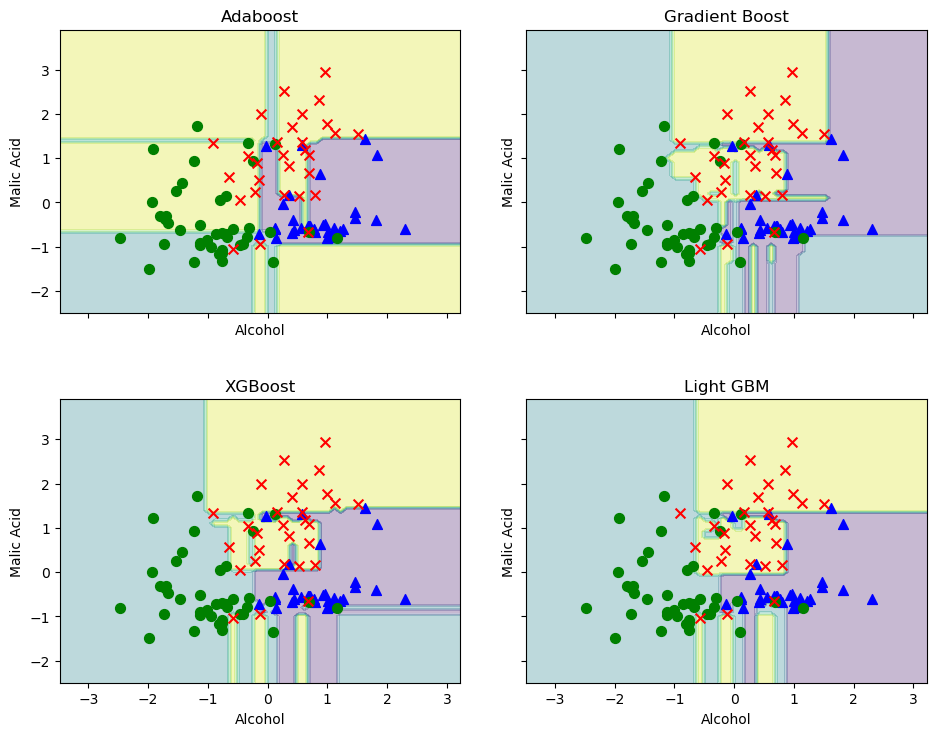

In [13]:
plot_ds(clfs, names, X_train_std, y_train, X_train_std, y_train)

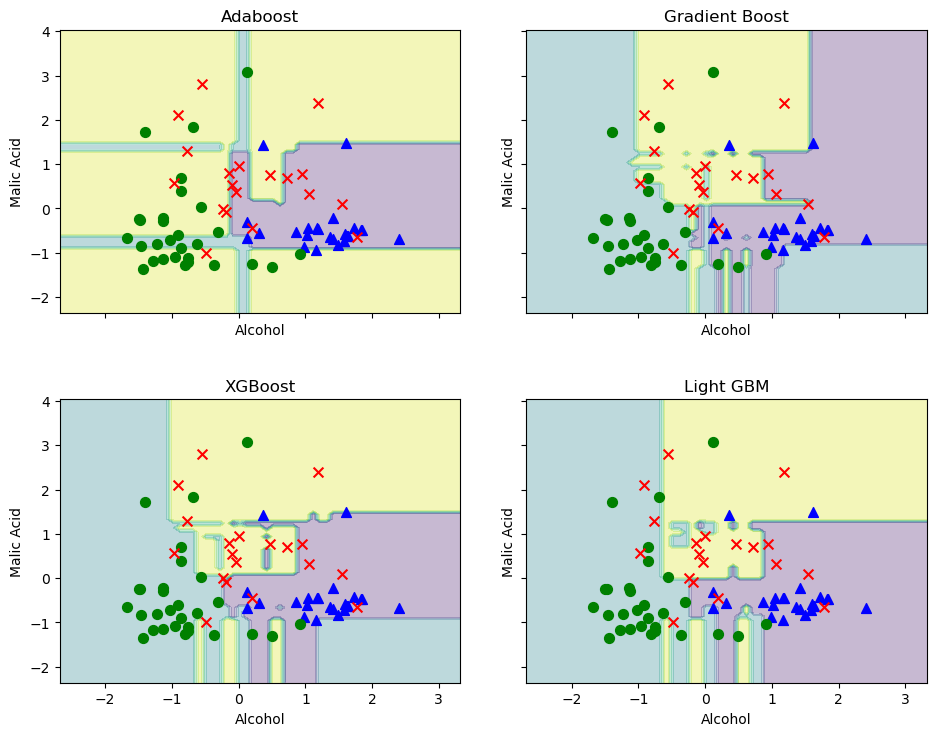

In [14]:
plot_ds(clfs, names, X_train_std, y_train, X_test_std, y_test)